### Import libraries & Read the datasets

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

### Data retrieved from

- Life expectancy: https://www.gapminder.org/data/
- GDP per capita (2017 version): https://www.gapminder.org/data/documentation/gd001/
- Population : https://www.gapminder.org/data/documentation/gd001/

### Reference 

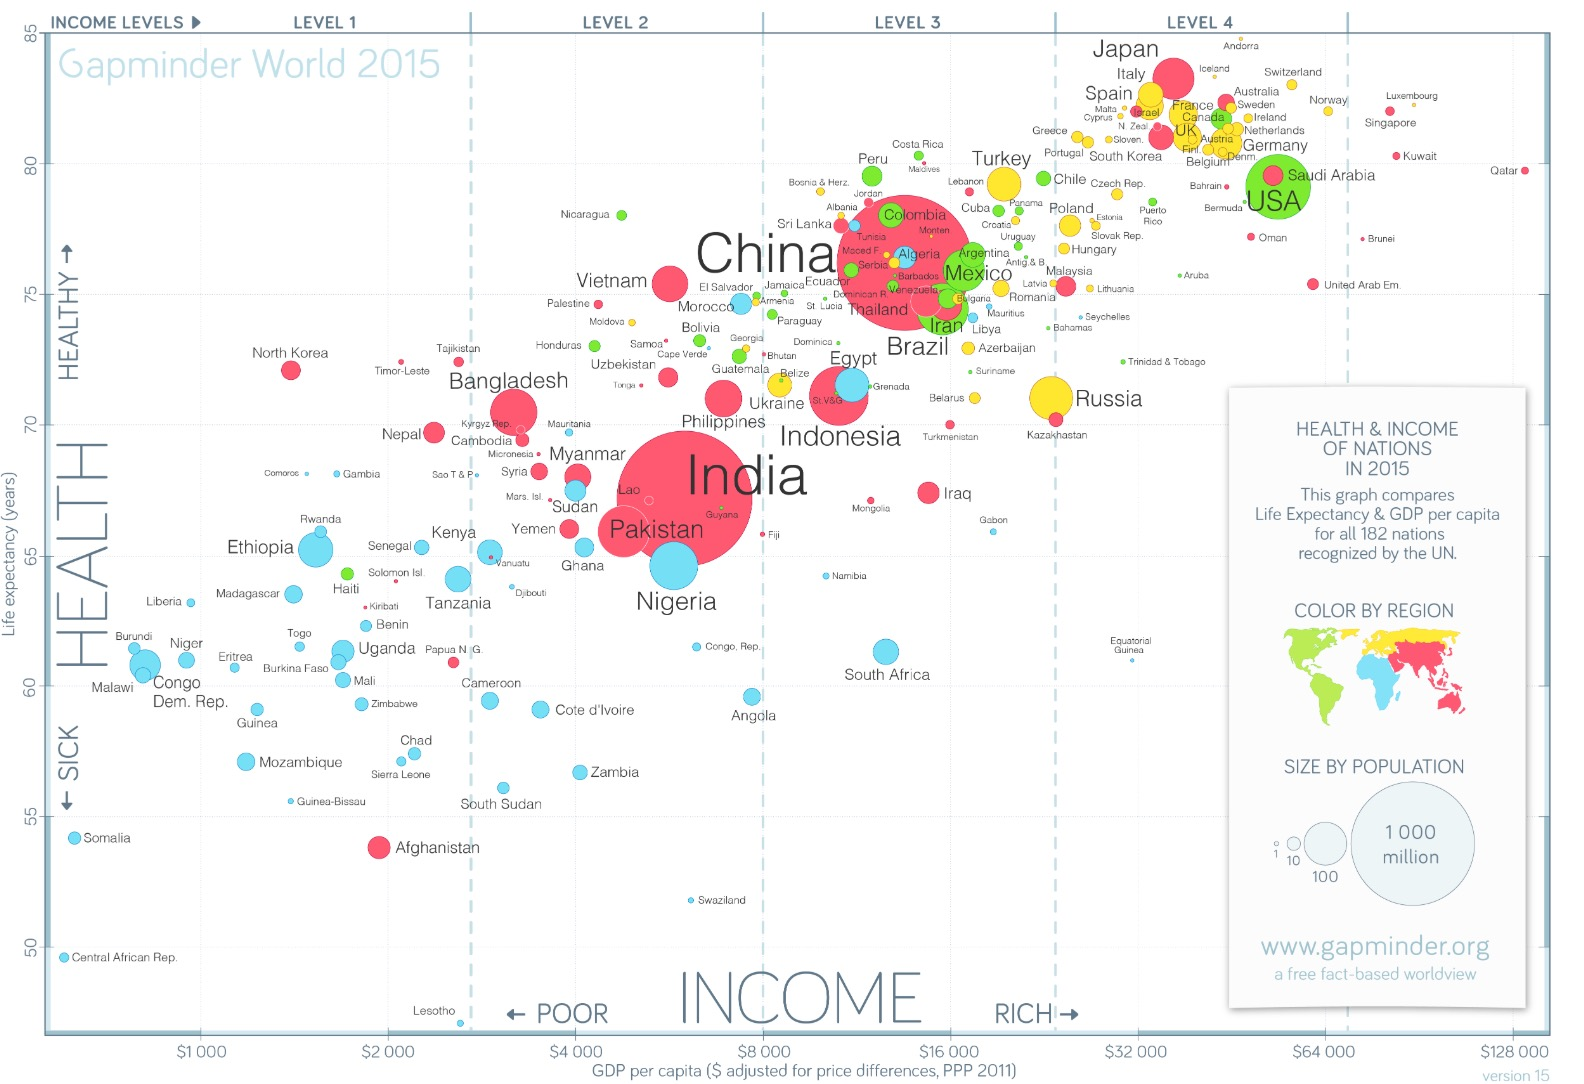

In [6]:
Image(filename='/Users/leohermansson/Documents/Year 2/Gapminder/Gapminder_World_2015.jpeg')

In [7]:
df_lex = pd.read_csv('/Users/leohermansson/Documents/Year 2/Gapminder/lex.csv')
df_gdp_pcap = pd.read_csv('/Users/leohermansson/Documents/Year 2/Gapminder/gdp_pcap.csv')
df_pop = pd.read_excel('/Users/leohermansson/Documents/Year 2/Gapminder/GM-Population - Dataset - v8 (1).xlsx', sheet_name = 'data-for-countries-etc-by-year')

In [8]:
df_lex.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.9,76.1,76.2,76.4,76.5,76.7,76.8,77.0,77.1,77.3
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,75.8,75.9,76.0,76.1,76.3,76.4,76.5,76.7,76.8,76.9
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,88.9,89.0,89.2,89.3,89.4,89.5,89.6,89.7,89.8,90.0
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,91.0,91.1,91.3,91.4,91.5,91.6,91.7,91.8,91.9,92.0
4,UAE,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,83.7,83.8,83.9,84.0,84.1,84.2,84.3,84.5,84.6,84.7


In [9]:
df_gdp_pcap.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,481,481,481,481,481,481,481,481,481,...,4680,4790,4910,5020,5140,5260,5380,5510,5640,5780
1,Angola,373,374,376,378,379,381,383,385,386,...,24.5k,25k,25.6k,26.1k,26.6k,27.1k,27.7k,28.2k,28.8k,29.3k
2,Albania,469,471,472,473,475,476,477,479,480,...,54.5k,55.1k,55.7k,56.3k,56.9k,57.4k,58k,58.6k,59.2k,59.8k
3,Andorra,1370,1370,1370,1380,1380,1380,1390,1390,1390,...,79.9k,80.2k,80.4k,80.7k,81k,81.3k,81.5k,81.8k,82k,82.3k
4,UAE,1140,1150,1150,1150,1160,1160,1170,1170,1180,...,92.6k,92.6k,92.6k,92.7k,92.7k,92.7k,92.8k,92.8k,92.8k,92.9k


In [10]:
df_pop.head()

,geo,name,time,Population
0,afg,Afghanistan,1800,3280000.0
1,afg,Afghanistan,1801,3280000.0
2,afg,Afghanistan,1802,3280000.0
3,afg,Afghanistan,1803,3280000.0
4,afg,Afghanistan,1804,3280000.0


### To make the data more readable and easy to work with, I will use Pandas melt function to store all years in one column called 'Year'.

In [12]:
years = [col for col in df_lex.columns if col.isnumeric()]

In [13]:
df_lex_melted = df_lex.melt(
    
    id_vars = ['country'],
    value_vars = years,
    var_name = 'year',
    value_name = 'life_expectancy'
    
).copy()

df_gdp_pcap_melted = df_gdp_pcap.melt(
    
    id_vars = ['country'],
    value_vars = years,
    var_name = 'year',
    value_name = 'gdp_per_capita'
    
).copy()

In [14]:
df_lex_melted

,country,year,life_expectancy
0,Afghanistan,1800,28.2
1,Angola,1800,27.0
2,Albania,1800,35.4
3,Andorra,1800,NaN
4,UAE,1800,30.7
...,...,...,...
58991,Samoa,2100,82.3
58992,Yemen,2100,82.1
58993,South Africa,2100,75.2
58994,Zambia,2100,74.5


In [15]:
df_gdp_pcap_melted

,country,year,gdp_per_capita
0,Afghanistan,1800,481
1,Angola,1800,373
2,Albania,1800,469
3,Andorra,1800,1370
4,UAE,1800,1140
...,...,...,...
58690,Samoa,2100,28.6k
58691,Yemen,2100,7650
58692,South Africa,2100,50.1k
58693,Zambia,2100,20.3k


### I want to merge these datasets. I want to have one dataset containing  data about country, year, life expectancy, gdp_per_capita, and population.

In [17]:
merged_df = pd.merge(df_lex_melted, df_gdp_pcap_melted, on=['country', 'year'])

In [18]:
merged_df

,country,year,life_expectancy,gdp_per_capita
0,Afghanistan,1800,28.2,481
1,Angola,1800,27.0,373
2,Albania,1800,35.4,469
3,Andorra,1800,NaN,1370
4,UAE,1800,30.7,1140
...,...,...,...,...
58690,Samoa,2100,82.3,28.6k
58691,Yemen,2100,82.1,7650
58692,South Africa,2100,75.2,50.1k
58693,Zambia,2100,74.5,20.3k


In [19]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58695 entries, 0 to 58694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          58695 non-null  object 
 1   year             58695 non-null  object 
 2   life_expectancy  57345 non-null  float64
 3   gdp_per_capita   58695 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.8+ MB


In [20]:
merged_df['year'] = merged_df['year'].astype(int)

In [21]:
merged_df.head()

,country,year,life_expectancy,gdp_per_capita
0,Afghanistan,1800,28.2,481
1,Angola,1800,27.0,373
2,Albania,1800,35.4,469
3,Andorra,1800,NaN,1370
4,UAE,1800,30.7,1140


### Cleaning gdp_per_capita values so they can be used for visualization

In [23]:
def clean_gdp_per_capita(val):
    val = str(val).replace(',', '')
    if 'k' in val:
        val = val.replace('k', '')
        return float(val) * 1000
    return float(val)

In [24]:
merged_df['gdp_per_capita'] = merged_df['gdp_per_capita'].apply(clean_gdp_per_capita)

In [25]:
df_pop = df_pop.rename(columns={'name': 'country', 'time': 'year'})
df_pop

,geo,country,year,Population
0,afg,Afghanistan,1800,3280000.0
1,afg,Afghanistan,1801,3280000.0
2,afg,Afghanistan,1802,3280000.0
3,afg,Afghanistan,1803,3280000.0
4,afg,Afghanistan,1804,3280000.0
...,...,...,...,...
59292,zwe,Zimbabwe,2096,36840486.0
59293,zwe,Zimbabwe,2097,36932287.0
59294,zwe,Zimbabwe,2098,37019886.0
59295,zwe,Zimbabwe,2099,37096560.0


In [26]:
merged_df = pd.merge(merged_df, df_pop, on=['country', 'year'])

In [27]:
merged_df = merged_df.drop(['geo'], axis=1).copy()

In [28]:
merged_df

,country,year,life_expectancy,gdp_per_capita,Population
0,Afghanistan,1800,28.2,481.0,3280000.0
1,Angola,1800,27.0,373.0,1567028.0
2,Albania,1800,35.4,469.0,400000.0
3,Andorra,1800,NaN,1370.0,2654.0
4,Argentina,1800,33.2,1700.0,534000.0
...,...,...,...,...,...
57185,Samoa,2100,82.3,28600.0,383557.0
57186,Yemen,2100,82.1,7650.0,110035634.0
57187,South Africa,2100,75.2,50100.0,94314448.0
57188,Zambia,2100,74.5,20300.0,64473916.0


### Data for 2025

In [30]:
merged_df_2025 = merged_df[merged_df['year']==2025]

In [31]:
merged_df_2025

,country,year,life_expectancy,gdp_per_capita,Population
42750,Afghanistan,2025,65.1,1330.0,43844111.0
42751,Angola,2025,66.3,5760.0,39040039.0
42752,Albania,2025,79.7,17400.0,2771508.0
42753,Andorra,2025,83.2,55000.0,82904.0
42754,Argentina,2025,77.6,21900.0,45851378.0
...,...,...,...,...,...
42935,Samoa,2025,71.4,5810.0,219306.0
42936,Yemen,2025,69.3,1660.0,41773878.0
42937,South Africa,2025,66.0,13300.0,64747319.0
42938,Zambia,2025,64.3,3550.0,21913874.0


### For extra detail and customisability, which is shown in the scatter plot below, I want the continent for each country.

In [33]:
north_america = [
    'Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba',
    'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras',
    'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia',
    'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States'
]

south_america = [
    'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay',
    'Peru', 'Suriname', 'Uruguay', 'Venezuela'
]

africa = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon',
    'Central African Republic', 'Chad', 'Comoros', 'Democratic Republic of the Congo', 'Djibouti',
    'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana',
    'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar',
    'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger',
    'Nigeria', 'Republic of the Congo', 'Rwanda', 'São Tomé and Príncipe', 'Senegal', 'Seychelles',
    'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia',
    'Uganda', 'Zambia', 'Zimbabwe'
]

europe = [
    'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria',
    'Croatia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
    'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania',
    'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia',
    'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia',
    'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City'
]

asia = [
    'Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia',
    'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan',
    'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia',
    'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar',
    'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan',
    'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan',
    'Vietnam', 'Yemen'
]

oceania = [
    'Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand',
    'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'
]

In [34]:
def assign_region(country):
    if country in north_america:
        return 'North America'
    if country in south_america:
        return 'South America'
    if country in africa:
        return 'Africa'
    if country in europe:
        return 'Europe'
    if country in asia:
        return 'Asia'
    if country in oceania:
        return 'Oceania'
    else:
        return 'Unknown'

In [35]:
merged_df['region'] = merged_df['country'].apply(assign_region)

In [36]:
merged_df

,country,year,life_expectancy,gdp_per_capita,Population,region
0,Afghanistan,1800,28.2,481.0,3280000.0,Asia
1,Angola,1800,27.0,373.0,1567028.0,Africa
2,Albania,1800,35.4,469.0,400000.0,Europe
3,Andorra,1800,NaN,1370.0,2654.0,Europe
4,Argentina,1800,33.2,1700.0,534000.0,South America
...,...,...,...,...,...,...
57185,Samoa,2100,82.3,28600.0,383557.0,Oceania
57186,Yemen,2100,82.1,7650.0,110035634.0,Asia
57187,South Africa,2100,75.2,50100.0,94314448.0,Africa
57188,Zambia,2100,74.5,20300.0,64473916.0,Africa


In [51]:
merged_df_2025 = merged_df[merged_df['year']==2025].copy()
merged_df_2025

,country,year,life_expectancy,gdp_per_capita,Population,region
42750,Afghanistan,2025,65.1,1330.0,43844111.0,Asia
42751,Angola,2025,66.3,5760.0,39040039.0,Africa
42752,Albania,2025,79.7,17400.0,2771508.0,Europe
42753,Andorra,2025,83.2,55000.0,82904.0,Europe
42754,Argentina,2025,77.6,21900.0,45851378.0,South America
...,...,...,...,...,...,...
42935,Samoa,2025,71.4,5810.0,219306.0,Oceania
42936,Yemen,2025,69.3,1660.0,41773878.0,Asia
42937,South Africa,2025,66.0,13300.0,64747319.0,Africa
42938,Zambia,2025,64.3,3550.0,21913874.0,Africa


## Visualizations

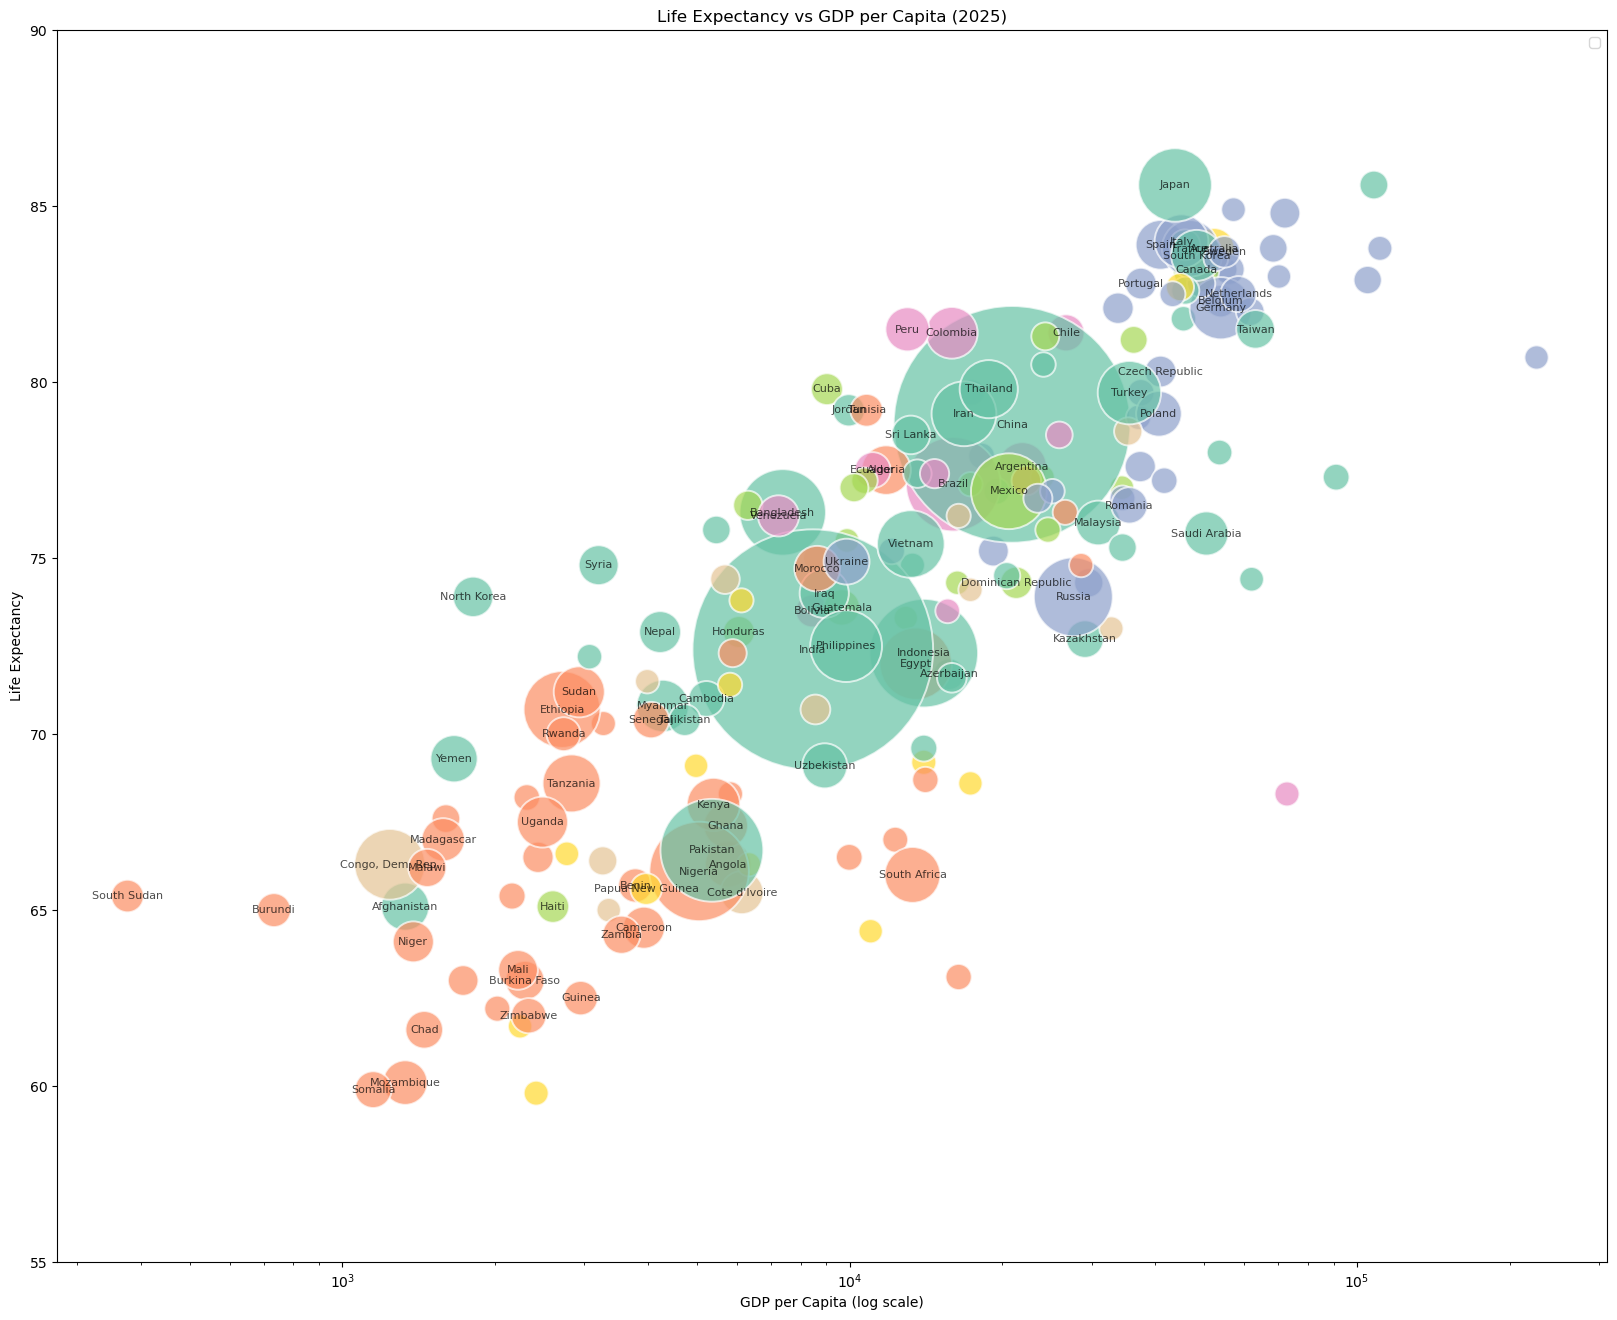

In [53]:
plt.figure(figsize=(20, 16))

sns.scatterplot(
    data=merged_df_2025,
    x='gdp_per_capita',
    y='life_expectancy',
    hue='region',
    size='Population',
    sizes=(300, 30000),
    alpha=0.7,
    edgecolor='white',
    palette='Set2'
)

for i, row in merged_df_2025.iterrows():
    if row['Population'] >= 10000000:
        plt.text(
            row['gdp_per_capita'],
            row['life_expectancy'],
            row['country'],
            fontsize=8,
            ha='center',
            va='center',
            alpha=0.7)

plt.xscale('log')
plt.title('Life Expectancy vs GDP per Capita (2025)')
plt.xlabel('GDP per Capita (log scale)')
plt.ylabel('Life Expectancy')
plt.ylim(55, 90)

plt.legend('')
plt.show()

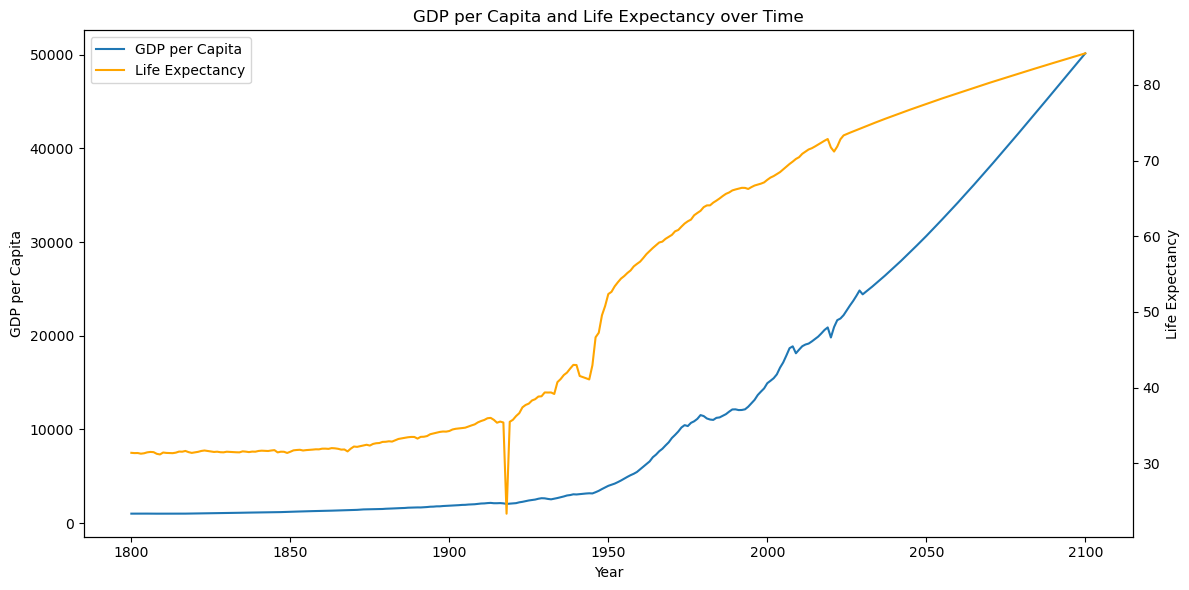

In [55]:
yearly_data = merged_df.groupby('year')[['gdp_per_capita', 'life_expectancy']].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('GDP per Capita')
ax1.plot(yearly_data['year'], yearly_data['gdp_per_capita'], color='tab:blue', label='GDP per Capita')

ax2 = ax1.twinx()
ax2.set_ylabel('Life Expectancy')
ax2.plot(yearly_data['year'], yearly_data['life_expectancy'], color='orange', label='Life Expectancy')

plt.title('GDP per Capita and Life Expectancy over Time')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.tight_layout()
plt.show()

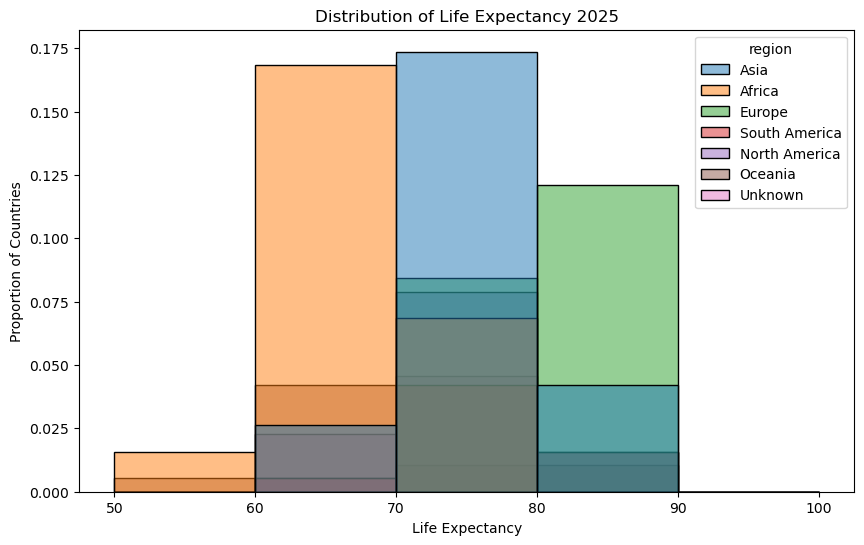

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df_2025, x='life_expectancy', bins=[50, 60, 70, 80, 90, 100], stat='probability', hue='region')

plt.title('Distribution of Life Expectancy 2025')
plt.xlabel('Life Expectancy')
plt.ylabel('Proportion of Countries')
plt.show()

In [61]:
merged_df

,country,year,life_expectancy,gdp_per_capita,Population,region
0,Afghanistan,1800,28.2,481.0,3280000.0,Asia
1,Angola,1800,27.0,373.0,1567028.0,Africa
2,Albania,1800,35.4,469.0,400000.0,Europe
3,Andorra,1800,NaN,1370.0,2654.0,Europe
4,Argentina,1800,33.2,1700.0,534000.0,South America
...,...,...,...,...,...,...
57185,Samoa,2100,82.3,28600.0,383557.0,Oceania
57186,Yemen,2100,82.1,7650.0,110035634.0,Asia
57187,South Africa,2100,75.2,50100.0,94314448.0,Africa
57188,Zambia,2100,74.5,20300.0,64473916.0,Africa


In [71]:
population_growth = merged_df.groupby(['year', 'region'])['Population'].sum().reset_index()

Text(0.5, 1.0, 'Population Distribution among Continents over Time')

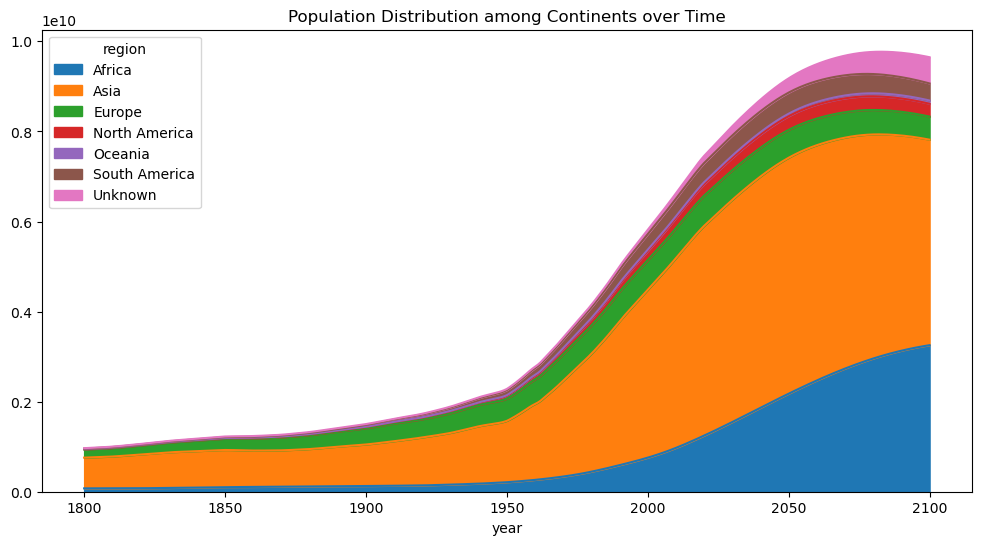

In [73]:
pivot_df = population_growth.pivot(index='year', columns='region', values='Population')
pivot_df.plot.area(figsize=(12, 6))
plt.title('Population Distribution among Continents over Time')